In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

c:\Users\JINU\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

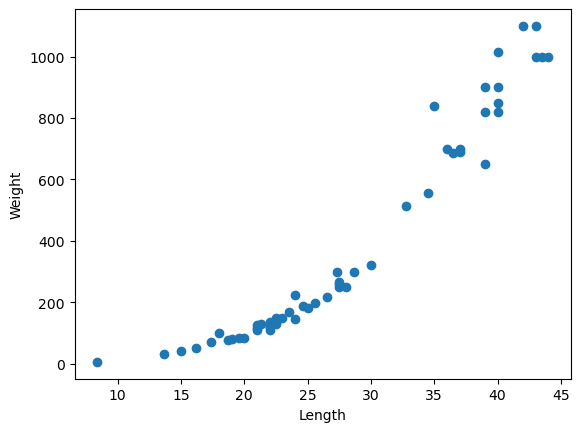

In [4]:
plt.scatter(perch_length,perch_weight)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [5]:
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
#reshape해서 다시 지정해주어야함. inplace가 자동으로 되지않는다. 

In [7]:
train_input.shape,test_input.shape

((42, 1), (14, 1))

-1로 지정하면 나머지 원소 개수로 모두 채우라는 뜻이 되므로 shape로 다시 확인해야하는 번거로움이 적음

In [8]:
Knr = KNeighborsRegressor()

In [9]:
Knr.fit(train_input,train_target)

KNeighborsRegressor()

In [10]:
Knr.score(test_input,test_target)
#회귀의 경우 score를 통해 결정계수,R^2를 나타낸다.
#R^2 = 1- ((target-predict)^2의 합/(target-mean)^2의 합)이다.

0.992809406101064

In [11]:
test_prediction = Knr.predict(test_input)

Mae=mean_absolute_error(test_target,test_prediction)
Mae

19.157142857142862

In [12]:
Knr.score(train_input,train_target)

0.9698823289099254

    이상하다 trainset의 점수가 testset의 점수보다 낮다?
    이런 경우에는 underfitting이 된 것이고 trainset의 점수가 매우 좋은 반면 testset에서의 점수가 지나치게 좋지 않다면 overfitting이 되어 일반화가 잘 되지않은 모델링이다. 

    지금의 경우는 trainset의 수가 적어서 발생한 경우 같아보인다. 이를 해결하는 방법중 하나는 n_neighbor를 수정하는 것이다. 이를 통해 데이터의 표본수가 적기 떄문에 좀 더 국지적인 패턴에 민감하게 하는 것이다. 

In [13]:
Knr.n_neighbors = 3

In [14]:
Knr.fit(train_input,train_target)
Knr.score(train_input,train_target)

0.9804899950518966

In [15]:
Knr.score(test_input,test_target)

0.9746459963987609

    trainset의 score가 test의 score보다 높고 큰 점수차를 보이지 않기 때문에 적당한 fitting 상태인 것으로 보인다. 

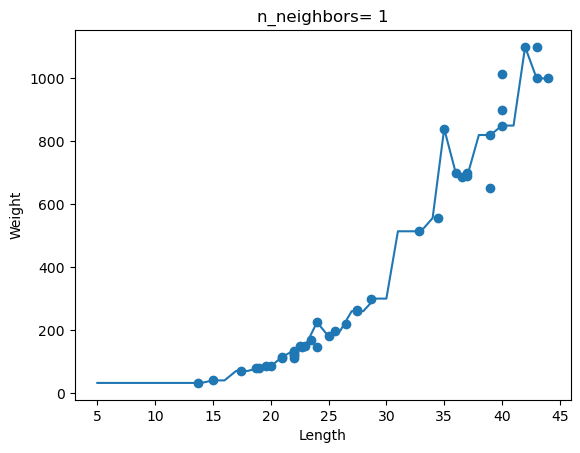

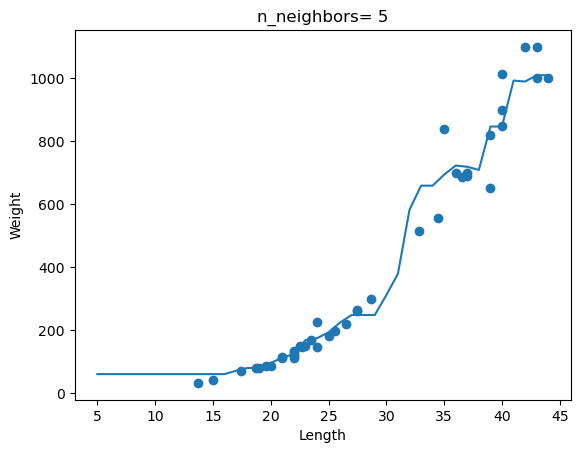

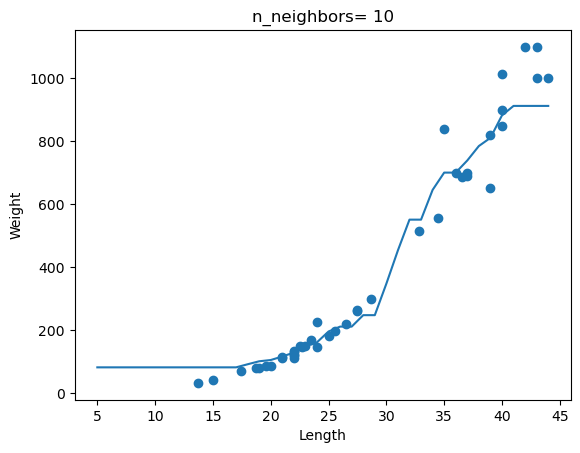

In [16]:
#연습문제
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for i in [1,5,10]:
    knr.n_neighbors = i 
    knr.fit(train_input,train_target)
    prediction = knr.predict(x)

    plt.scatter(train_input,train_target)
    plt.plot(x,prediction)
    plt.title(f'n_neighbors= {i}')
    plt.xlabel("Length")
    plt.ylabel("Weight")
    plt.show()


    n_neighbor가 1인 경우에 각 개별 관측치를 전부다 따라가는 overfitting의 모습을 보여주지만 
    n_neighbor가 커짐에 따라 개별 관측치에 치우치기 보다 더 단순한 선형을 보임을 알 수 있다. 

---

In [18]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [20]:
knr.predict([[50]])

array([1033.33333333])

    실제 측정치는 1500인데 1033으로 예측했으니 오차 값이 꽤 있다! 

In [22]:
train_input.shape

(42, 1)

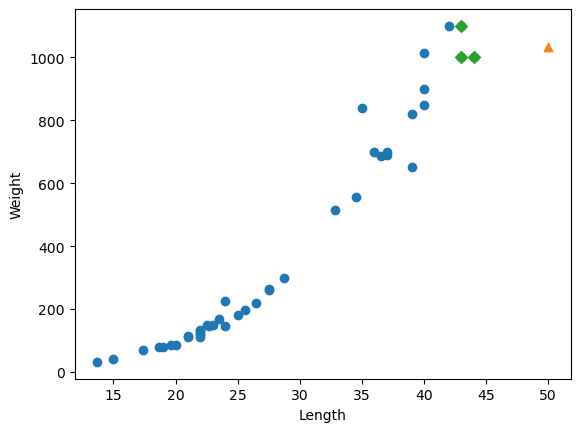

In [24]:
distance, indexes = knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(50,1033,marker="^")
plt.scatter(train_input[indexes],train_target[indexes],marker="D")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

     이래서 값에 오차가 발생한 것이다.<br> 기존에 우리가 갖고 있던 데이터 들이 보이는 선형 관계를 고려하지 못한 채, 길이에 대해 가까운 순서대로 적용하게 되면서 문제가 발생한 것이다.이를 해결하기 위해 이들이 보이는 선형적 관계를 반영할 필요가 있어보인다. 

In [25]:
np.mean(train_target[indexes])

1033.3333333333333

    따라서 45를 초과하는 값을 대상으로 예측을 진행하면 모두 무게를 1033으로 예측하는 진풍경이 펼쳐진다.

    이를 해결하기 위해 linear regression model을 통해 해결해보자.

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_input,train_target)
lr.score(test_input,test_target)

0.8247503123313558

In [27]:
lr.score(train_input,train_target)

0.939846333997604

    여기서 구해낸 점수는 정확도가 아닌 R^2 점수이다.

In [28]:
lr.predict([[50]])

array([1241.83860323])

    아까 Knr만 진행했을때의 1033보다 높은 1241의 값을 예측하고 있다. 

    LR을 통해 구해낸 직선의 기울기와 절편은 coef_와 intercept_를 통해 확인할 수 있다. 

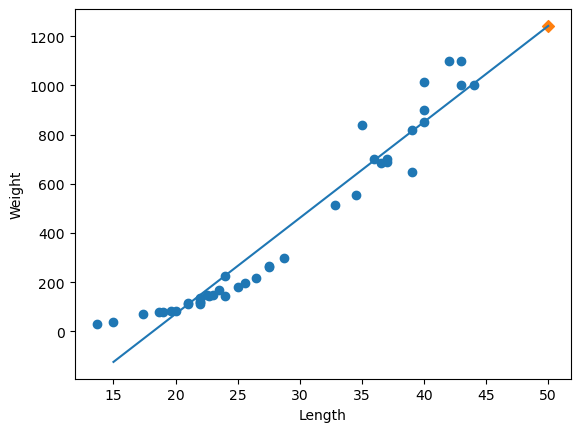

In [31]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker="D")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

    하지만 이것보다 2차 방정식 직선이 더 이 모델을 잘 설명하고 있다고 보여진다.
    이를 위해 길이를 제곱한 항을 훈련세트에 추가해야한다.(feat.numpy)

In [37]:
train_powered2_added = np.column_stack((train_input**2,train_input))
test_powered2_added = np.column_stack((test_input**2,test_input))

In [38]:
lr=LinearRegression()
lr.fit(train_powered2_added,train_target)

LinearRegression()

In [42]:
lr.predict([[50**2,50]])

array([1573.98423528])

**예측값은 완전 유사해졌군요!**

In [44]:
lr.coef_, lr.intercept_ # 내림차순 대로 계수가 뜬다고 생각하자

(array([  1.01433211, -21.55792498]), 116.05021078278259)

In [49]:
lr.coef_[1]

-21.557924978837356

In [50]:
point.shape

(34,)

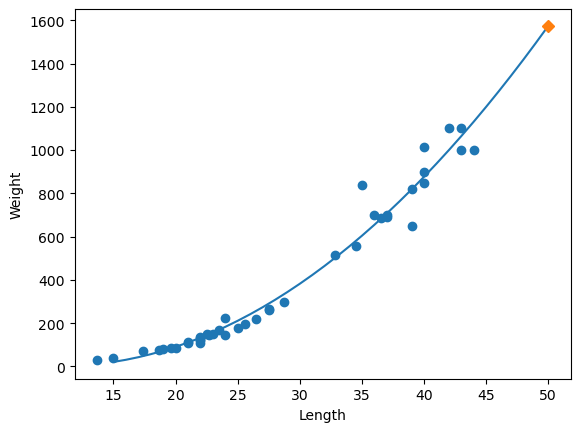

In [57]:
point= np.arange(15,51)
plt.scatter(train_input,train_target)
plt.plot(point,lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.plot(50,1574,marker="D")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [39]:
lr.score(test_powered2_added,test_target)

0.9775935108325121

In [40]:
lr.score(train_powered2_added,train_target)

0.9706807451768623

    엥 선생님 test가 더 높아요 이러면 underfitted아닌가요 다항회귀는 어떻게 복잡하게 만들수 있죠?